# Metropolis Hastings

In [1]:
import numpy as np
from typing import Callable, List, Tuple
from scipy import stats

try:
    from jupyterthemes import jtplot
    jtplot.style()
except ImportError:
    pass

import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
def metropolis_hastings(
    n_samples: int,
    pdf: Callable[[np.ndarray], np.ndarray],
    ensemble_size: int = 1,
    proposal_mean: float = 0.0,
    proposal_std: float = 1.0,
) -> np.ndarray:
    """Runs metropolis hastings to perform ensemble-sampling on a distribution
    
    The proposal function is a normal distribution with a specified mean
    and standard deviation.
    
    Parameters
    ----------
    n_samples : int
        The number of samples to be drawn for each sequence in the ensemble.
    
    pdf: Callable[[ndarray], ndarray]
        The norm-independent pdf for the distribution being sampled from.
    
    ensemble_size : int, optional (default=1)
        The number of independent sequences of samples to be drawn.
    
    proposal_mean: float = 0.0,
    
    proposal_std: float = 1.0,
    
    Returns
    -------
    numpy.ndarraym shape=(N_ensemble, N_samples)
        The ensemble of sample-sequences drawn."""

    position = np.full(fill_value=proposal_mean, dtype=float, shape=(ensemble_size,))
    samples = np.empty(dtype=float, shape=(ensemble_size, n_samples))

    for sample_index in range(n_samples):
        proposal = np.random.normal(
            loc=position, scale=proposal_std, size=ensemble_size
        )
        accept_probs = pdf(proposal) / pdf(position)
        accepted = np.random.rand(ensemble_size) < accept_probs
        position[accepted] = proposal[accepted]
        samples[..., sample_index] = np.copy(position)
    return np.array(samples)


def ecdf(data: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    y = np.linspace(1 / len(data), 1, len(data))
    x = np.sort(data)
    return x, y

In [114]:
ensemble_size = 10
n_samples = 1000

distr = stats.expon(loc=10, scale=100.)

samples = metropolis_hastings(
    n_samples,
    distr.pdf,
    ensemble_size=ensemble_size,
    proposal_mean=distr.mean(),
    proposal_std=distr.std(),
)
true_samples = distr.rvs(10000)

## Animating Evolution of Metropolis Hastings ECDFs with Number of Samples

In [86]:
from ipywidgets import interact
from ipywidgets import Select, IntSlider

true_ecdf = ecdf(true_samples)


def animate_MCMC_ecdfs(num_pts: list):
    
    fig, ax = plt.subplots()
    for run in samples:
        ax.plot(*ecdf(run[:num_pts]))
    ax.plot(*true_ecdf, lw=3, ls="--", color="white")
    

num_pts_select = IntSlider(
    min=1, max=samples.shape[1], step=10)


interact(animate_MCMC_ecdfs, num_pts=num_pts_select);

interactive(children=(IntSlider(value=1, description='num_pts', max=1000, min=1, step=10), Output()), _dom_cla…

# Just Plot It :(


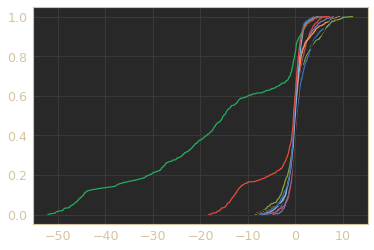

In [69]:
fig, ax = plt.subplots()
for run in samples:
    ax.plot(*ecdf(run))
#ax.plot(*ecdf(true_samples), lw=3, ls="--", color="white")



# "Trace Plot"

The trace plot helps us diagnose how appropriate the scale of our proposal function is. 
- Too small leads to small, conservative updates with little exploration.
- Too large leads to improbable proposals, meaning we see stark plateaus with intermittent
jumps


In [146]:
ensemble_size = 10
n_samples = 1000

distr = stats.norm(loc=10, scale=100.)

samples = metropolis_hastings(
    n_samples,
    distr.pdf,
    ensemble_size=ensemble_size,
    proposal_mean=distr.mean(),
    proposal_std=1E4,
)
true_samples = distr.rvs(10000)
true_ecdf = ecdf(true_samples)

Text(0, 0.5, 'sample value')

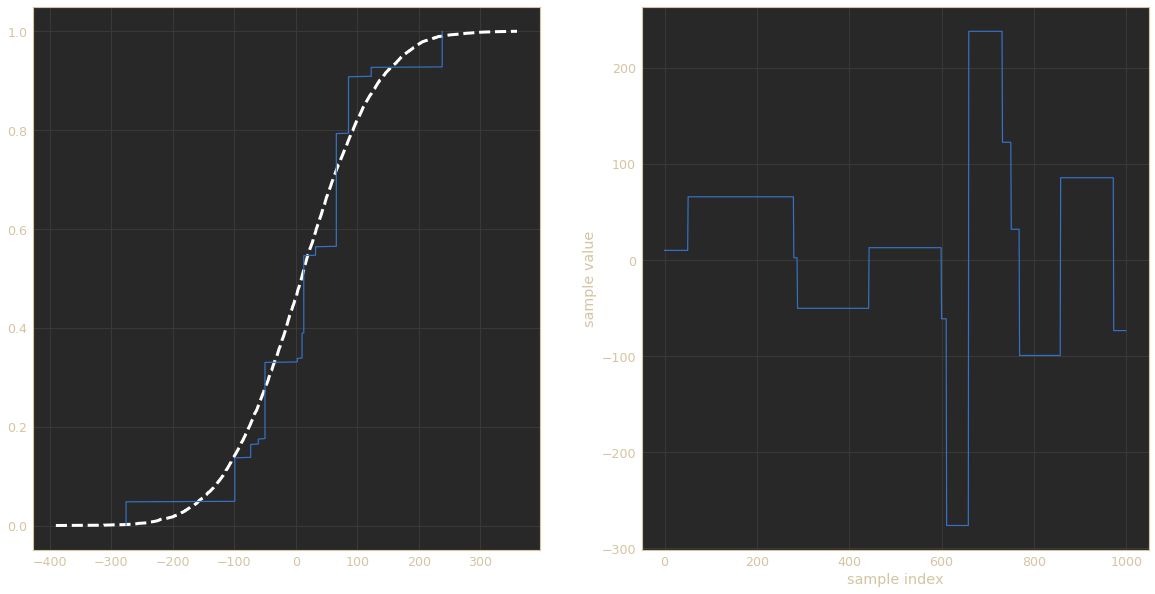

In [147]:
fig, (ax1, ax2) = plt.subplots(figsize=(20, 10), ncols=2)
ax1.plot(*true_ecdf, lw=3, ls="--", color="white")
ax1.plot(*ecdf(samples[0]))
ax2.plot(samples[0])
ax2.set_xlabel("sample index")
ax2.set_ylabel("sample value")